import numpy as np
import pandas as pd
data = pd.read_excel('sample.xls')
#display(data.head())
states = data['Region'].unique()
display(states)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.set(style="ticks", color_codes=True)
sns.barplot(x=data['Sales'], y=data['Profit']);

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("sample - Copy.xls")
#cat = input("Enter Category: ")
p1 = df.loc[df['Category'] == 'Furniture']
#reg = input("Enter Region")
products = p1.loc[p1['Region'] == 'West']
#products

In [3]:
to_drop = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category','Product Name', 'Quantity', 'Discount', 'Profit']
products.drop(to_drop, axis = 1, inplace = True)
products = products.sort_values('Order Date')
#products 

#products.isnull().sum() ==> Displays how many null values we have in each column

In [4]:
products = products.groupby('Order Date')['Sales'].sum().reset_index()
products.head()

,Order Date,Sales
0,2014-01-13,333.999
1,2014-01-19,181.470
2,2014-01-20,19.300
3,2014-01-27,333.000
4,2014-01-31,290.666


In [5]:
products = products.set_index('Order Date') #Sets Order Date as index

In [11]:
y = products['Sales'].resample('MS').mean() #Resample ==> To divide the data into bin size
#y # contains Order date(each quartile) and mean sales for that quartile

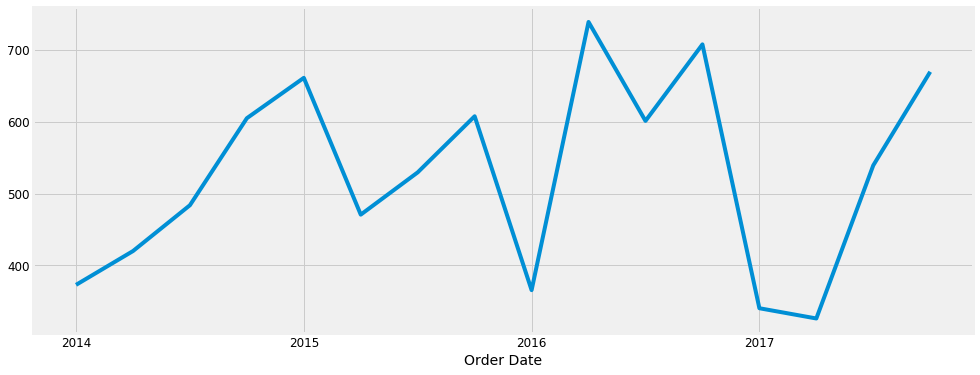

In [7]:
y.plot(figsize=(15, 6))
plt.show() #Graph for year-wise every quartile to avg sales for that quartile

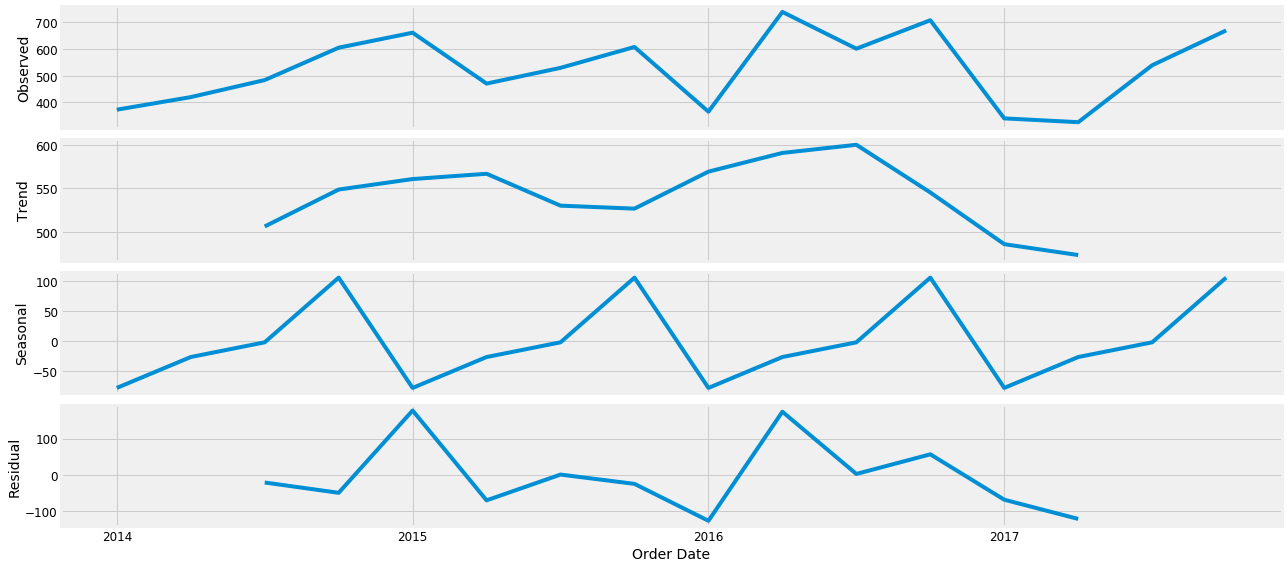

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8 # to change the graph size width, height
decomposition = sm.tsa.seasonal_decompose(y, model='addictive') # import statsmodels.api as sm
#Time Series decomposition link - https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
fig = decomposition.plot()
plt.show()

##### Arima model is a statistical method for time series forecasting.
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

##### itertools.product(*iterables[, repeat])
Cartesian product of input iterables.

Roughly equivalent to nested for-loops in a generator expression. For example, product(A, B) returns the same as ((x,y) for x in A for y in B).

The nested loops cycle like an odometer with the rightmost element advancing on every iteration. This pattern creates a lexicographic ordering so that if the input’s iterables are sorted, the product tuples are emitted in sorted order.

To compute the product of an iterable with itself, specify the number of repetitions with the optional repeat keyword argument. For example, product(A, repeat=4) means the same as product(A, A, A, A).

In [12]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


#### SARIMAX is a model used to predict future points of time series
SARIMAX - Seasonal AutoRegressive Integrated Moving Averages with eXogenous regressors

In [13]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:730.0815566460676


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1577.0619793573574
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:485.3525279535317
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:505.7445331999504


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1714.3811495381094
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:335.3790943747688
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:689.2857084935567


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2771.6090096045136
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:474.4433944303295
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:507.4683915691067


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2700.5941756932402
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:337.1860661728966
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:653.5428101811949


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1322.7081301557384
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:494.5442602874209
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:496.93559086163566


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1467.1734163930043
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:333.8680019722784
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:615.9756423072427
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2501.9964562085474
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:464.73467663016186
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:483.33646231307205
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2513.6496682534917
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:323.5238955463855
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:666.5065084254986


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1372.1595954549318
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:487.24810260830793
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:486.17969562307115


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:322.31066809981724
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:633.3634563791895


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2714.8687957120155
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:474.85859912119025
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.6815014780325
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2796.125404211558
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:323.0289032916839
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:644.0547553231437
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1380.3499841973844
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:480.29393165122235
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:464.8470422037854


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1044.2694636869942
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:310.0183530017858
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:617.3659629374957
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2504.761387722963
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:464.8026590558253
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:463.0289503986018
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2585.99387130189
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:311.254450289596


In [14]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit() #Fits the model to most likelihood using kalman filter -- https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.fit.html
#kalman filter -- https://medium.com/@jaems33/understanding-kalman-filters-with-python-2310e87b8f48
print(results.summary().tables[1]) #Summarizes the model

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3050      0.413     -0.738      0.461      -1.115       0.505
ma.L1         -0.3967      0.406     -0.978      0.328      -1.192       0.398
ar.S.L12      -0.1823      0.279     -0.653      0.514      -0.729       0.365
sigma2      5.661e+04   3.02e+04      1.876      0.061   -2545.107    1.16e+05


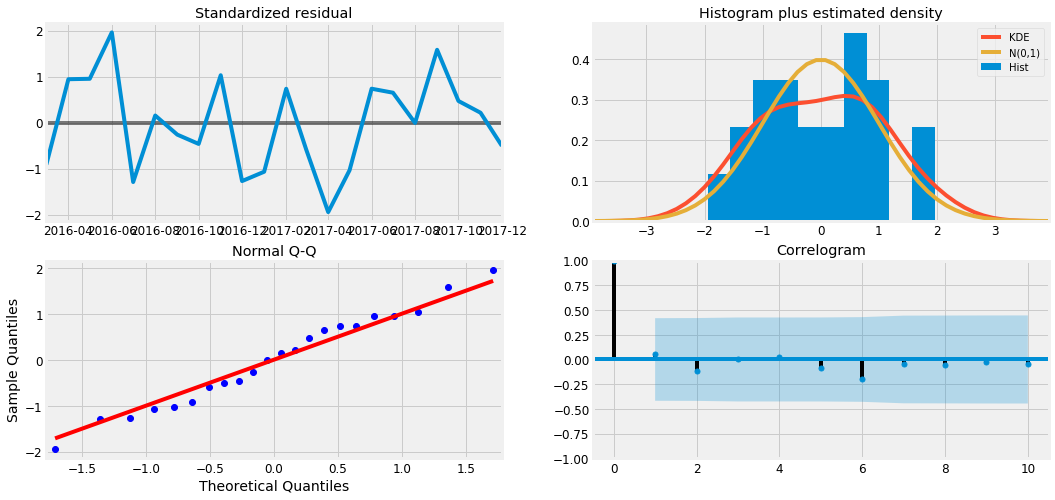

In [15]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### Validating Forecast

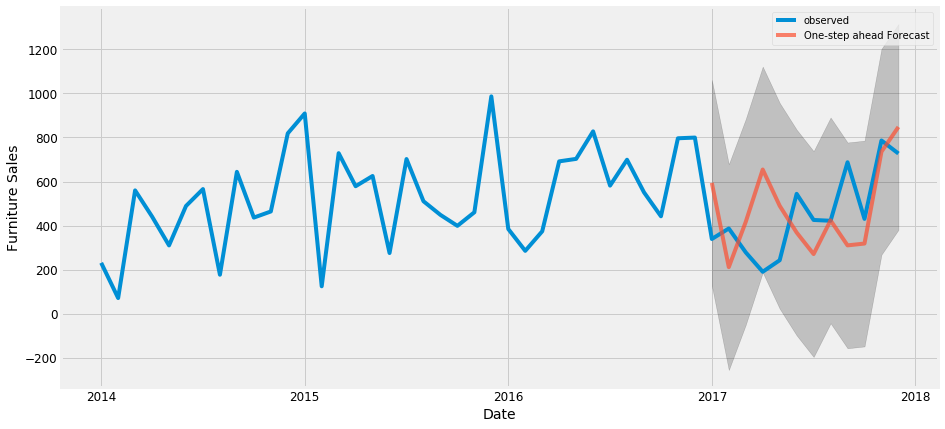

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [18]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 51384.69
The Root Mean Squared Error of our forecasts is 226.68


## Producing and visualizing forecast

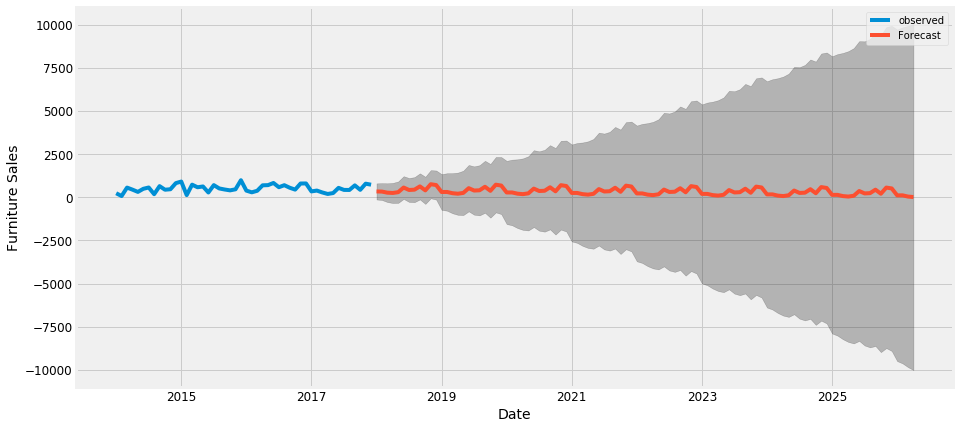

In [19]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

## USING FB PROPHET

In [31]:
f1 = df.loc[df['Category'] == 'Furniture']
furniture = df.loc[df['Region'] == 'South']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

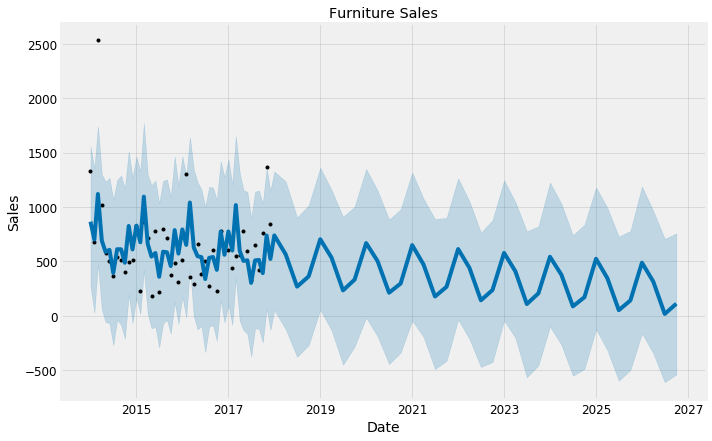

In [35]:
from fbprophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='QS')
furniture_forecast = furniture_model.predict(furniture_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

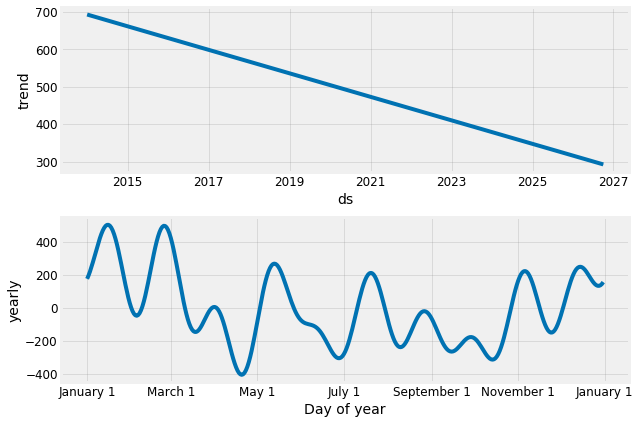

In [36]:
furniture_model.plot_components(furniture_forecast);

# REGIONAL - WISE OVERALL SALES

In [37]:
product = df.loc[df['Region'] == 'South']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
product.drop(cols, axis=1, inplace=True)
product = product.sort_values('Order Date')
product = product.groupby('Order Date')['Sales'].sum().reset_index()
product = product.set_index('Order Date')
y_product = product['Sales'].resample('QS').mean()
product = pd.DataFrame({'Order Date':y_product.index, 'Sales':y_product.values})

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 11.0.
C:\Users\admin\Anaconda3\lib\site-packages\fbprophet\forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)


<Figure size 1296x432 with 0 Axes>

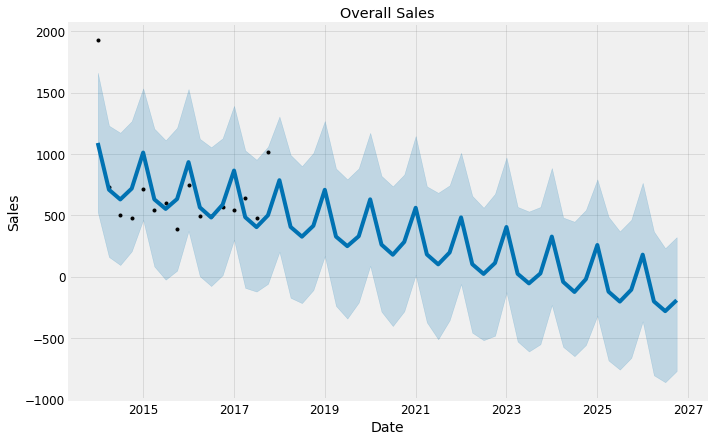

In [38]:
from fbprophet import Prophet
product = product.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
product_model = Prophet(interval_width=0.95)
product_model.fit(product)
product_forecast = product_model.make_future_dataframe(periods=36, freq='QS')
product_forecast = product_model.predict(product_forecast)
plt.figure(figsize=(18, 6))
product_model.plot(product_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Overall Sales');

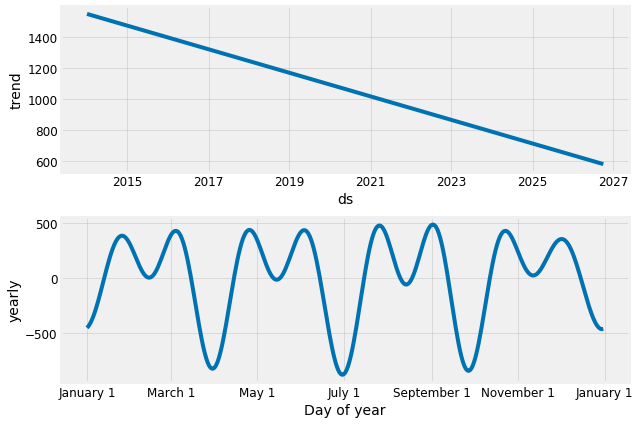

In [39]:
product_model.plot_components(product_forecast);